# CS-6570 Lecture 14 - Tree Methods
**Dylan Zwick**

*Weber State University*

That I was able to do this depends a great deal on the nature of the questions that I asked. Specifically, I designed them to provide the greatest amount of *information gain*, given the amount of information I'd learned so far. This method was, in fact, a decision tree, which is the subject of our class today.

Decision trees are classification methods that involve the stratification or segmenting of the predictor space into simple regions. The predicted value of an observation is then just the average value or the most common value of the training data within that observation's region.

Tree-based methods are simple and useful for interpretation, however they typically are not competitive with the best supervised learning approaches in terms of prediction accuracy. Sometimes this is OK, but the real power of these methods comes when multiple trees are combined to yield a consensus prediction. We'll get into that later. First, let's look at the two major types of decision trees: regression trees, which are used for making numeric predictions, and classification trees, which are used for making categorical predictions.

But, of course, first thing we want to do is import our favorite libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Regression Trees**

To build a regression tree, roughly speaking there are two steps:

1. Divide the predictor space - the set of possible values for the input variables $X_{1}, X_{2}, \ldots, X_{p}$ into $J$ distinct and non-overlapping regions, $R_{1}, R_{2}, \ldots, R_{J}$.

2. For every observation that falls into the region $R_{J}$, make the same prediction, which is just the mean of the responses for the training observations in $R_{J}$.

![Decision Tree Diagram](LecturePNGs/Decision_Tree_Example.png)

How do we construct these regions? Well, the goal is to find boxes $R_{1}, R_{2}, \ldots, R_{J}$ that (of course!) minimize the RSS, where the RSS is given by the following where $\hat{y}_{R_{j}}$ is the mean response of the training observations within the $j$th box.
$\displaystyle \sum_{j = 1}^{J}\sum_{r \in R_{j}}(y_{r} - \hat{y}_{R_{j}})^{2}$

Unfortunately, it is computationally infeasible to consider every possible partition of the feature space into $J$ boxes. For this reason, we take a *top-down, greedy* approach that is known as *recursive binary splitting*. It's top-down because it begins at the top of the tree, and then successively splits the predictor space. It's greedy because at each step of the tree-building process, the *best* split is made at that particular step.

So, for example, to split the original region $R$ into two regions along the input variable $X_{j}$ we would create two regions:
$R_{1}(s) = \{X|X_{j} < s\}$ and $R_{2}(s) = \{X|X_{j} \geq s\}$,
such that $s$ minimizes the the equation:

$\displaystyle \sum_{x_{i} \in R_{1}(s)}(y_{i}-\hat{y}_{R_{1}})^{2} + \sum_{x_{j} \in R_{2}(s)}(y_{j} - \hat{y}_{R_{2}})^{2}$

The splitting begins with the entire region $R$, and finds the variable $X_{j}$ that provides the best split in terms of minimizing $RSS$. The algorithm then makes this split. Now there are two regions, and the algorithm finds the region and variable that provides the best split again in terms of minimizing $RSS$. It repeats this process until some stopping point is reached.

To prevent overfitting it's usually more effective to build a complicated decision tree, and then *prune* it back to obtain a subtree. In other words, we take our complicated tree $T_{0}$ and try to find a simpler subtree that still does a good job predicting the training data. The number of possible subtrees is typically extremely large, so it's not really possible to test them all - we need another method.

A common pruning method, which is similar to the Lasso regression method we studied earlier, is *cost complexity pruning* (also known as *weakest link pruning*). Under this approach, instead of considering every possible sub-tree, we consider a sequence of trees indexed by a non-negative tuning parameter $\alpha$. For each value of $\alpha$ there is a sub-tree $T \subset T_{0}$ such that

$\displaystyle \sum_{m = 1}^{|T|}\sum_{x_{i} \in R_{m}}(y_{i} - \hat{y}_{R_{m}})^{2} + \alpha|T|$

is minimized. Here $|T|$ indicates the number of terminal nodes of the tree $T$. It turns out as we increase $\alpha$, starting from $0$, branches get pruned from the tree in a nested and predictable fashion, so obtaining the whole sequence of sub-trees as a function of $\alpha$ is easy. The value $\alpha$ is a hyperparameter that can be found using a validation set or cross-validation.

**Classification Trees**

A classification tree is very similar to a regression tree, except that it is used to predict a qualitative response rather than a quantitative one. For a classification tree, instead of predicting the mean value within a region, the tree predicts the most commonly occurring class of training observations within a region.

We grow a classification tree much like a binary tree, except we can't use RSS as the criterion for making splits. Instead, there are three common splitting criteria:

* *Classification Error Rate*: 
$\displaystyle E = 1-max_{c}(p_{c})$,

* *Gini Index*: 
$\displaystyle G = \sum_{c = 1}^{C}p_{c}(1-p_{c})$,

* *Entropy*: 
$\displaystyle D = -\sum_{c = 1}^{C}p_{c}\log{p_{c}}$.


The way we determine our split is we take the split that gives us the greatest decease in the given metric. In practice, the classification error, while useful for pruning, isn't sufficiently sensitive for tree-growing, and one of the other two measures is preferred. Between he Gini index and the entropy the splits are usually very similar, and so there's not much to be gained by experimenting to find the most effective one.

*PYTHON BREAK*

A couple times in this lecture we'll be using the [zip](https://docs.python.org/3.3/library/functions.html#zip) function. What this function does is it creates an iterator that aggregates elements from multiple iterables. For example:

In [ ]:
A = ['a','b','c']
B = [1,2,3]

for letter, number in zip(A,B):
    print(letter + str(number))

*PYTHON BREAK OVER* - Now back to your regularly scheduled programming.

For a more visual comparison of the three different information criteria, let's plot the values for the probability range $[0,1]$. We'll add a scaled version of the entropy (divided by 2) to observe the Gini index is an intermediate measure between entropy and the classification error.

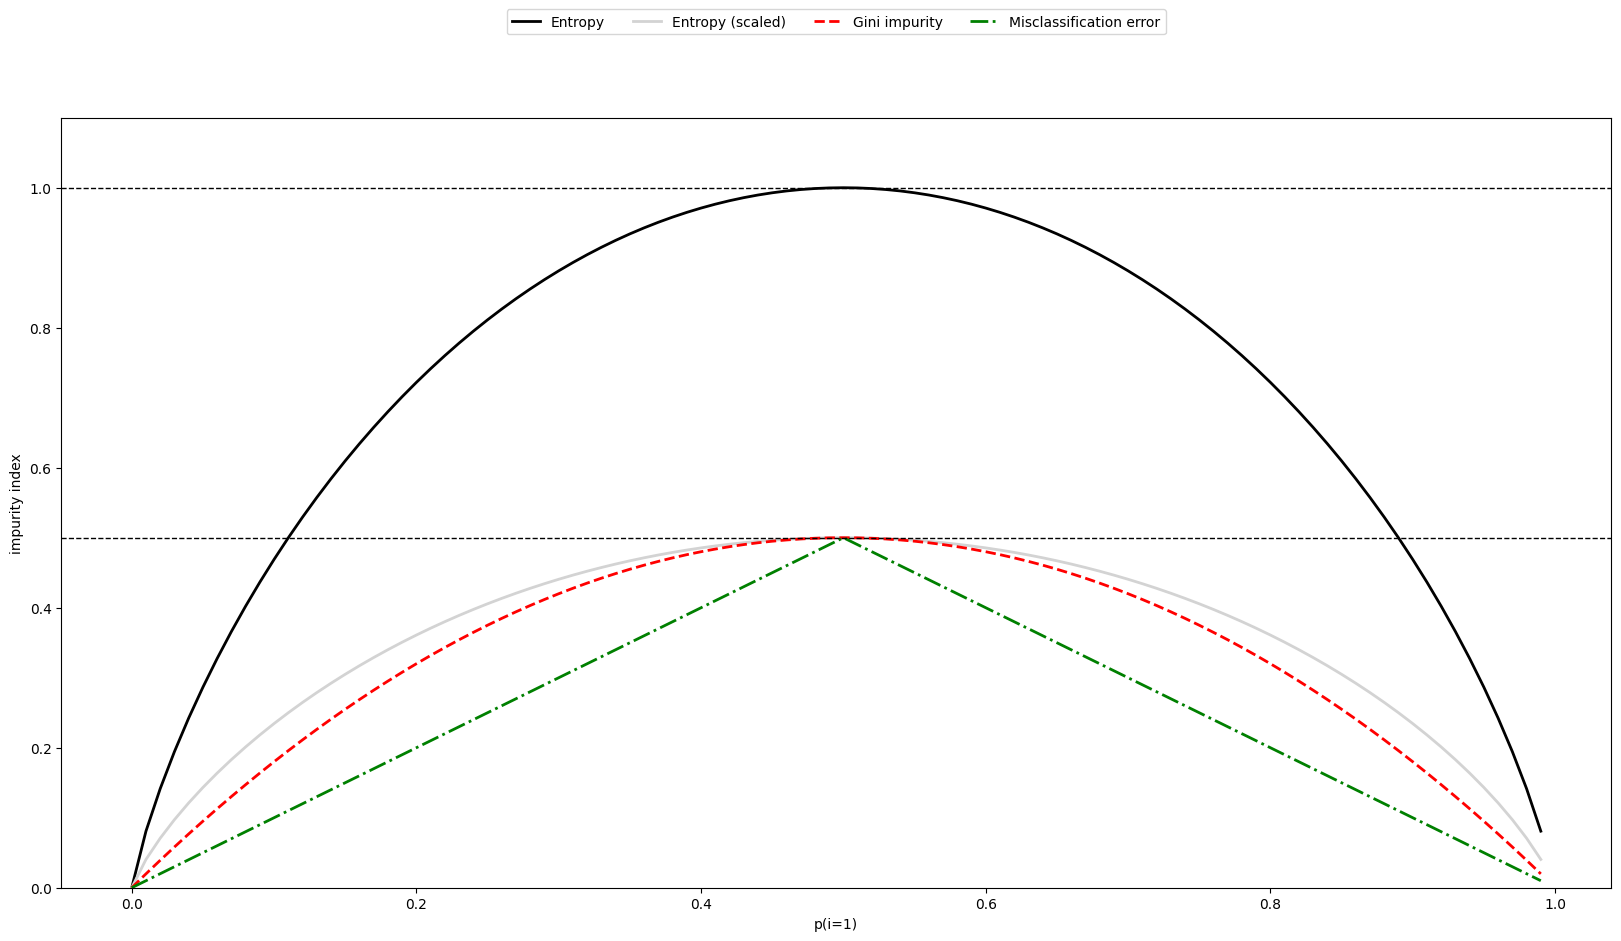

In [3]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if 0 < p else 0 for p in x]
sc_ent = [e * 0.5 for e in ent]
gini = [gini(i) for i in x]
err = [error(i) for i in x]
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini, err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center',  bbox_to_anchor=(0.5, 1.15), ncol = 4)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

Let's take a look at how we can build a decision tree using sklearn. To do this, we'll the [Wine Dataset](https://archive.ics.uci.edu/dataset/109/wine) consisting of 178 wine examples with 13 features describing their different chemical properties. 

we'll import the Iris dataset, which we've seen before, and which is available via sklearn. We'll assign the petal length and petal width to the feature matrix $X$, and the corresponding class labels of the flower species to the vector array $y$.

In [6]:
df_wine = pd.read_csv('Datasets/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline'] #The columns in the dataset just have numeric labels. These are the descriptions to which those labels correspond.
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


We're going to attempt to classify them according to their type of grape, of which there are three. To make this a little easier to visualize, we'll only look at two classes of wine and two properties - their alcohol, and OD280/OD315 which is a measure of protein concentration. We'll assign these to the feature matrix $X$, and the corresponding grape numbers to the vector array $y$.

In [7]:
# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

#Note - The to_numpy() function converts it to a numpy array, which will be useful to us later when we want to apply numpy functions.

y = df_wine['Class label'].to_numpy() 
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].to_numpy()

If we take a look at our target variable $y$, we see it looks like:

In [8]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

Now, we'd like to be predicting a $0$ or a $1$ instead of a $2$ or a $3$. To change this, we could just use some Pandas or Numpy tools, but there's another option. We could use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function from the preprocessing library in sklearn. This takes a set of $n$ label values, and encodes them as $0, 1, 2, \ldots n-1$.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

Also, we'll want to look at how our models do on training vs test data, so let's split them now.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

Now, we'll build a decision tree for this dataset. The sklearn library contains a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) within its [tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) library. Let's specify the decision criteria to be the entropy.

In [11]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=43)
tree_model.fit(X_train, y_train);

The sklearn tree library also provides a nice way to readily visualize a decision tree model, called [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree).

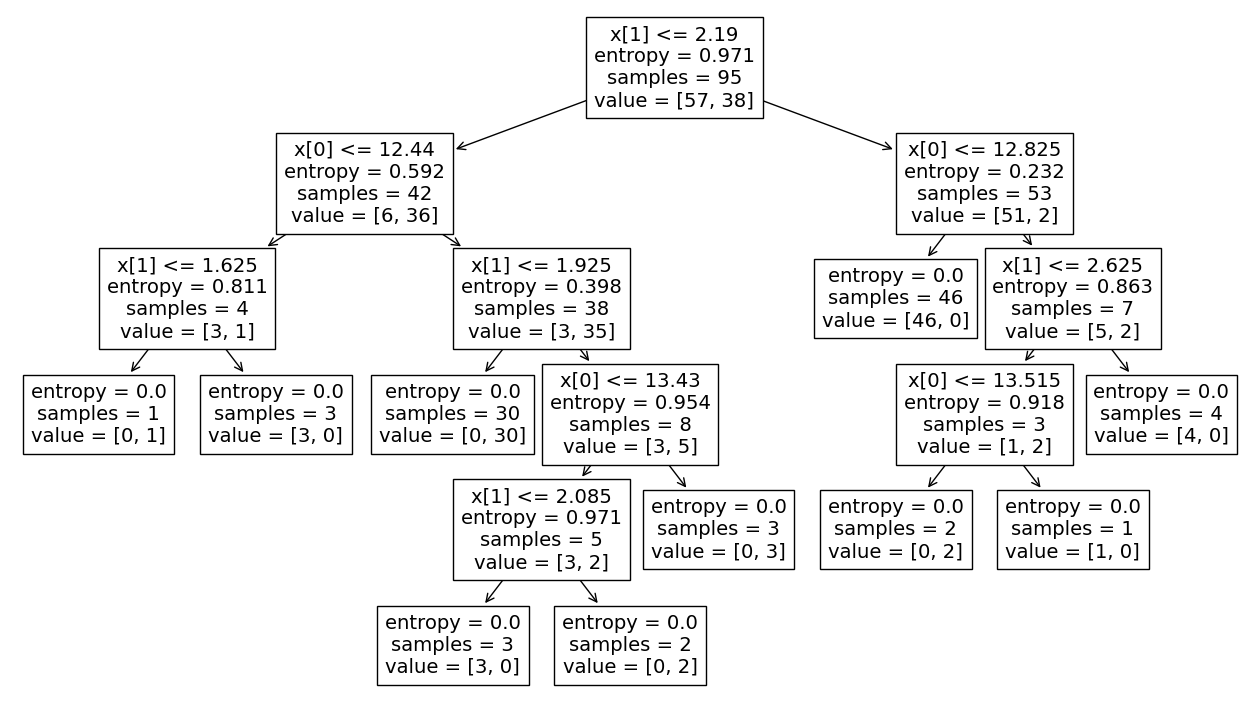

In [12]:
plt.figure(figsize=(16,9))
tree.plot_tree(tree_model)
plt.show()

While decision trees have the great virtue of being reasonably explainable (how they arrive at their decision can be understood by a person in a way that makes sense to that person), they have the (probably greater) vice of being mediocre predictors. Most of the time, in a pinch, people would rather have a correct answer that they don't understand, than an incorrect one that they do.

So, what then is the point of decision trees? Well, it turns out they can be saved through - democracy! More specifically, the power of decision trees can increase significantly using ensemble methods.

**Ensemble Methods**

![Plurality Vote](LecturePNGs/Plurality_Vote.png)

Ensemble methods are methods that make their decision through a vote, and the decision of the group is either a weighted average (in the regression context) or a weighted plurality vote (in the classification context).

The idea is that using the training dataset, we start by training $m$ different classifiers $(C_{1},C_{2},\ldots,C_{m})$. Depending on the technique, the ensemble can be built from different classification algorithms. Or, we can use the same base classification algorithm, but different datasets.

![Ensemble Learning](LecturePNGs/Ensemble_Learning.png)

To illustrate why ensemble methods can work better than the individual classifiers alone, let's apply some combinatorics. If we assume that we have a binary classification task, and each model has an independent error rate $\epsilon$, then we can express the error probability of an ensemble as a probability mass function of a binomial distribution:

$\displaystyle P(y \geq k) = \sum_{m = k}^{n} \binom{n}{m}\epsilon^{m}(1-\epsilon)^{n-m}$

If, for example, $\epsilon = .25$, and we have $11$ classifiers, then the error rate would be $0.034$. A big improvement!

More generally, as the base error improves, we see an ensemble error graph that looks like this:

![Ensemble Error](LecturePNGs/Ensemble_Error.png)

**Bagging**

The best way to successfully implement an ensemble method is to create multiple samples, train a model for each sample, and then combine them. However, it's usually either impossible or too costly to create multiple samples. So, what do we do if we've only got one sample, and we want to train a model on multiple samples? We boostrap!

The idea behind bagging is we draw bootstrap samples (random samples with replacement) from the initial training dataset. We then build a model on each sample, and combine our bootstrap models using (potentially weighted) majority vote.

![Bagging Process](LecturePNGs/Bagging_Process.png)

Let's see how bagging would work on our wine classification problem. A [bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) exists in scikit-learn, which we can import from the ensemble submodule. We will use an unpruned decision tree as the base classifier, and create an ensemble of 500 decision trees fit on different bootstrap samples of the training data.

In [14]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator=tree_model, n_estimators=500, random_state=43)

Now, let's see how the bagging classifier did vs the decision tree. We'll take a look at the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), which is just the percentage of classifications the model gets correct.

In [15]:
from sklearn.metrics import accuracy_score

tree_model.fit(X_train, y_train)
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag_model.fit(X_train, y_train)
y_train_pred = bag_model.predict(X_train)
y_test_pred = bag_model.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.792


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging train/test accuracies 1.000/0.833


It looks like both are perfect on the training data, but the bagging model does better on the test data.

Now, let's look at a *very* popular type of model that is based upon this bagging with decision trees approach.

**Random Forests**

Random forests are among the most widely used machine learning algorithms, probably due to their relatively good performance “out of the box” and ease of use. Not much data cleaning or parameter tuning is required to get reasonably strong results.

A random forest is very similar to bagging with decision trees which we discussed last time. The major difference is that with a random forest instead of growing our trees using the entire feature set, at each node of the tree we take a random subset of the feature set. The number of features to choose for this random subset is a hyperparameter, but a good rule of thumb is $\log_{2}{n} + 1$, where $n$ is the number of features.

This randomization helps to decorrelate the trees, which decorrelates their errors.

Like its BaggingClassifier, the [ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) library of sklearn has a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Let's use it:

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(criterion='entropy', n_estimators=25, max_features = 'log2', random_state=43)

forest_model.fit(X_train,y_train)
y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Random forest train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Random forest train/test accuracies 1.000/0.833


It looks like the Random Forest model did as well as the Bagging model in this case. In fact, I'd predict it classified the test data *exactly* the same as the bagging model.

We can plot the decision regions for our three classifiers - decision tree, bagging, and random forest - using the code below. In particular, we use the [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) function in matplotlib used for plotting filled contours.

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


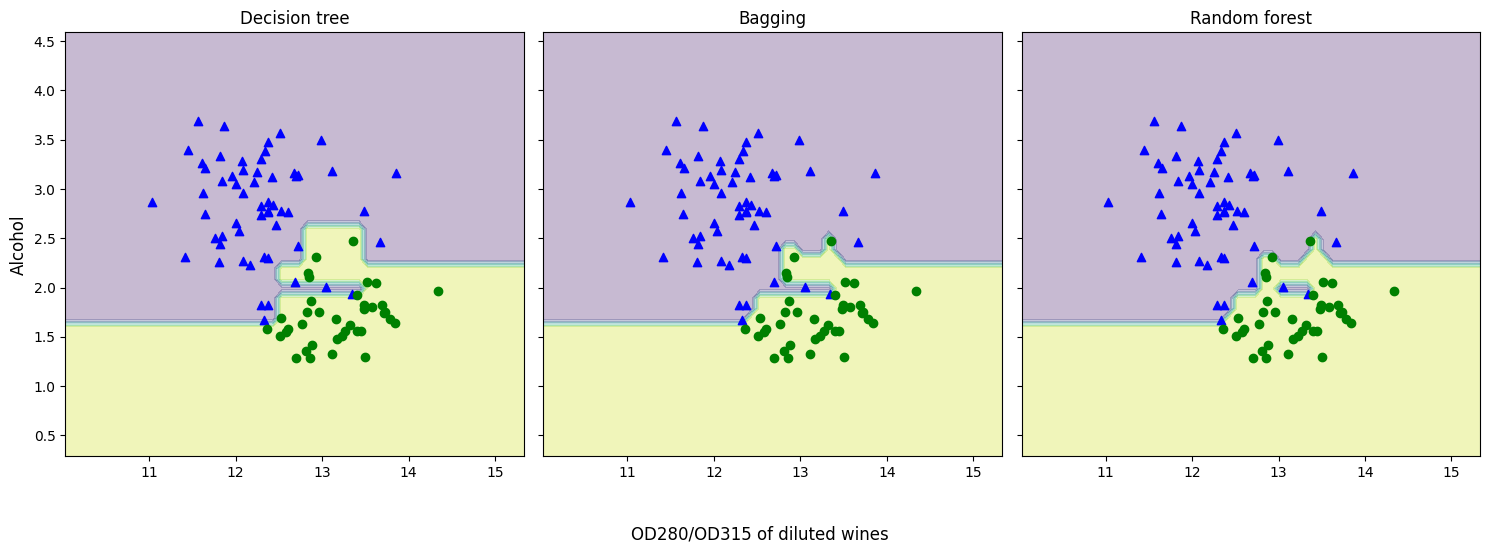

In [18]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 5))


for idx, model, tt in zip([0, 1, 2],
                        [tree_model, bag_model, forest_model],
                        ['Decision tree', 'Bagging', 'Random forest']):
    model.fit(X_train, y_train)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #Unravels the xx and yy grids and then concatenates them
    Z = Z.reshape(xx.shape) #Puts the output back into the proper grid format

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].scatter(X_train[y_train == 2, 0],
                       X_train[y_train == 2, 1],
                       c='red', marker='x')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(7, -0.5,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12)
plt.show()